# **Import** **Libraries**

In [2]:
import pandas as pd
import numpy as np
import ser
import lib_tree
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score1
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## 2 classes

# Loading Datasets

In [74]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S2= pd.read_csv("final_H355.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([2.0, 3.0,4.0])].index, 'labels']=1.0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([2.0, 3.0,4.0])].index, 'labels']=1.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)
yt = Final_Data_S2.labels
Xt= Final_Data_S2.drop(['Time', 'labels'], axis=1)

In [148]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.85,stratify=yt, random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(Xs, ys)
MAX = 3
target_names = ['Class 0', 'Class 1']

In [131]:
y_pred =  clf.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score( y_test_t, y_pred,average='weighted')
roc = roc_auc_score(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
print('Weighted F1 score: ', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix no TL:")
print(cm)

accuracy: 0.776431718061674
Weighted F1 score:  0.8303268371309012
ROC AUC score: 0.6026808510638297
precision: [0.76859504 0.8852459 ]
recall; [0.9893617 0.216    ]
fscore: [0.86511628 0.34726688]
support: [658 250]
Confusion Matrix no TL:
[[651   7]
 [196  54]]


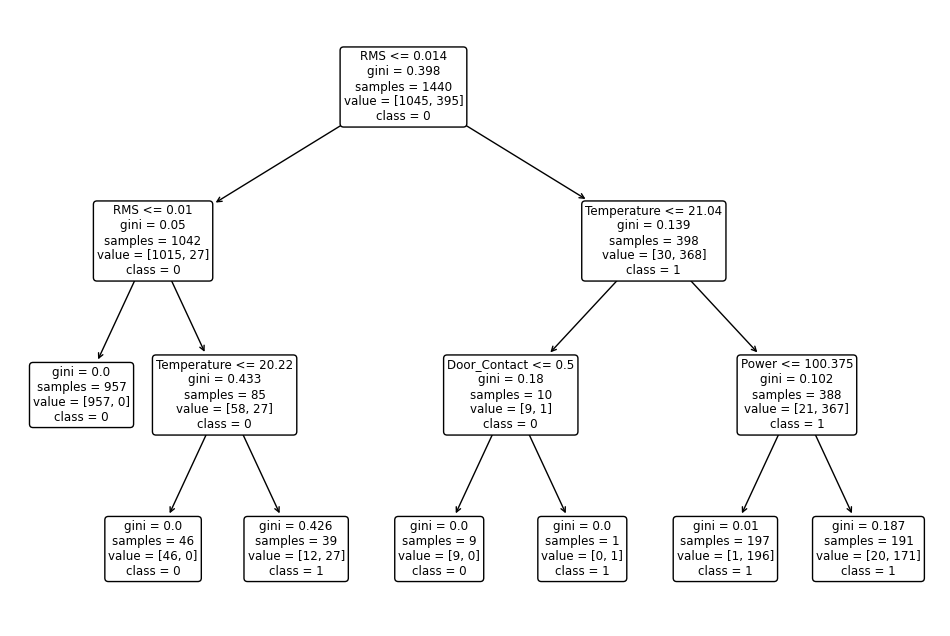

In [132]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1'], rounded=True)
plt.show()

In [129]:
model = DecisionTreeClassifier()
model = model.fit(X_train_t, y_train_t)
y_pred =  model.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score( y_test_t, y_pred, average='weighted')
roc = roc_auc_score(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
print('Weighted F1 score: ', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix no TL:")
print(cm)

accuracy: 0.9063876651982379
Weighted F1 score:  0.9099579353839135
ROC AUC score: 0.8510820668693009
precision: [0.90409027 0.91457286]
recall; [0.97416413 0.728     ]
fscore: [0.93782004 0.81069042]
support: [658 250]
Confusion Matrix no TL:
[[641  17]
 [ 68 182]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


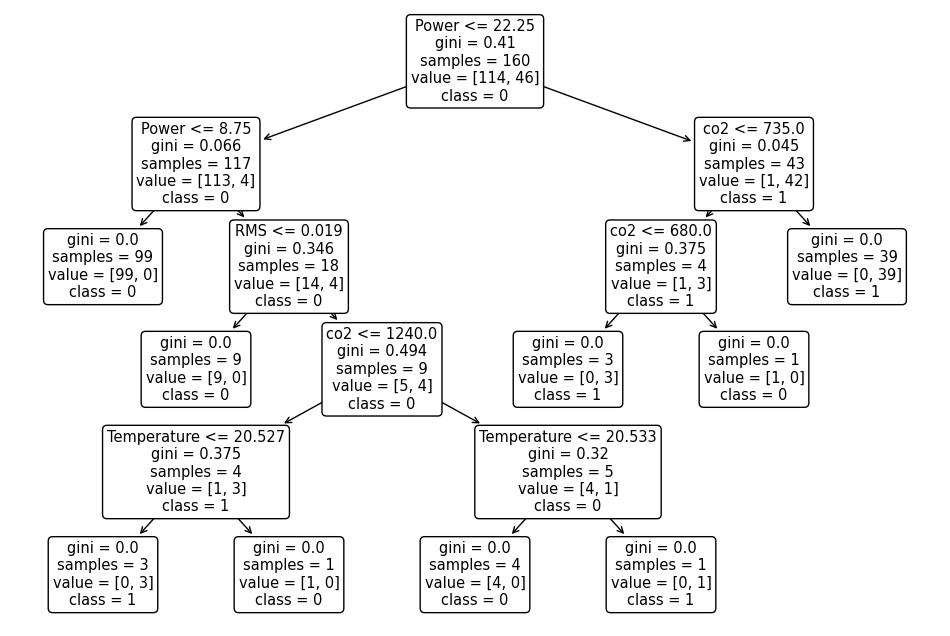

In [130]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1'], rounded=True)
plt.show()

## **Transfer Learning**

In [36]:
clf = DecisionTreeClassifier()
clf = clf.fit(Xs, ys)
SER = copy.deepcopy(clf)
ser.SER(0,SER, X_train_t, y_train_t, original_ser=True)

(0, False)

# SMOTE

In [39]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train_t, y_train_t)


In [42]:
SER_smote = copy.deepcopy(clf)
ser.SER(0, SER_smote, X_resampled, y_resampled, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_smote.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

ROC AUC score: 0.9024995160665893
precision: [0.94285714 0.88065844]
recall; [0.95579268 0.84920635]
fscore: [0.94928085 0.86464646]
support: [656 252]
accuracy: 0.9262114537444934
Confusion Matrix ser smote:
[[627  29]
 [ 38 214]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ROC AUC score: 0.928305265195509
precision: [0.94285714 0.88065844]
recall; [0.95579268 0.84920635]
fscore: [0.94928085 0.86464646]
support: [656 252]
accuracy: 0.9317180616740088
Confusion Matrix ser smote:
[[614  42]
 [ 20 232]]


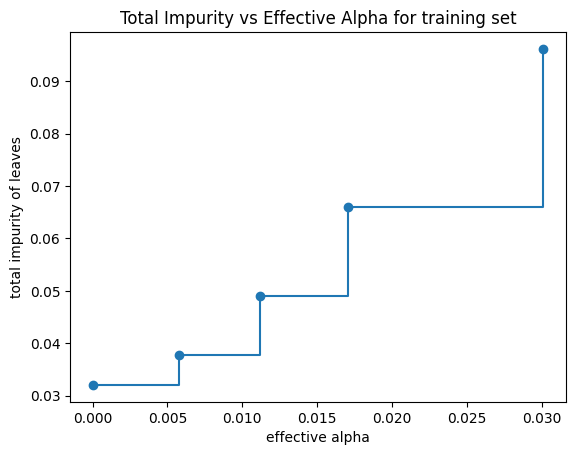

In [44]:

# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_smote.cost_complexity_pruning_path( X_resampled, y_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_smote = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth =3)

# Re-fit the tree
SER_smote.fit( X_resampled, y_resampled)

y_pred = SER_smote.predict(X_test_t)
roc = roc_auc_score(y_test_t, y_pred)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

In [45]:
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('weighted f1 score:', f1_weighted)

weighted f1 score: 0.9308723614799279


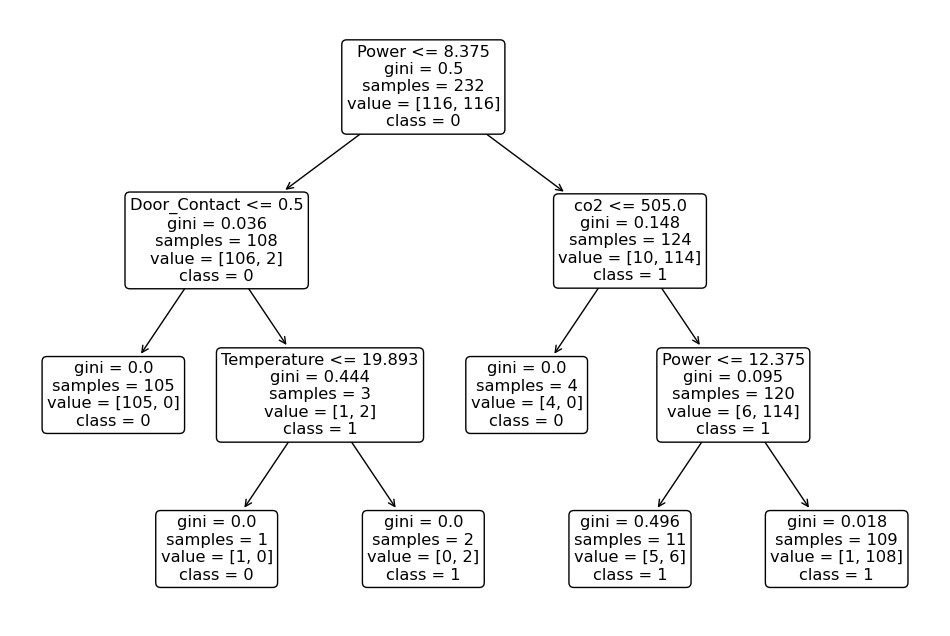

In [48]:
plt.figure(figsize=(12, 8))
plot_tree(SER_smote, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()

## UNDERSAMPLING

In [51]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42, sampling_strategy='not majority'
)
X_res, y_res = cc.fit_resample(X_train_t, y_train_t)
SER_cluster = copy.deepcopy(clf)
ser.SERRR(0, SER_cluster, X_res, y_res, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_cluster.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
roc = roc_auc_score(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy: 0.9196035242290749
weighted f1 score: 0.9188248379690017
ROC AUC score: 0.8905947541618273
precision: [0.93442623 0.87763713]
recall; [0.95579268 0.82539683]
fscore: [0.9449887  0.85071575]
support: [656 252]
Confusion Matrix:
[[627  29]
 [ 44 208]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy: 0.9405286343612335
weighted f1 score: 0.940456500007111
ROC AUC score: 0.9270712349980642
precision: [0.96024465 0.88976378]
recall; [0.95731707 0.8968254 ]
fscore: [0.95877863 0.89328063]
support: [656 252]
Confusion Matrix imb ser ClusterCentroids:
[[628  28]
 [ 26 226]]


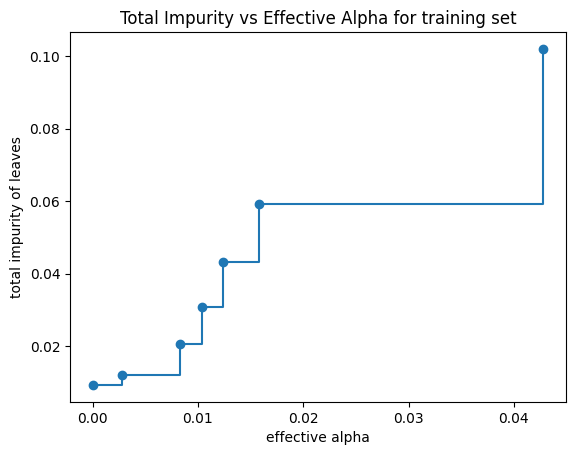

In [53]:

# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_cluster.cost_complexity_pruning_path(X_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_cluster = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth = 3)

# Re-fit the tree
SER_cluster.fit(X_res, y_res)

y_pred = SER_cluster.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
f1_weighted = f1_score(y_pred,y_test_t, average='weighted')
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix imb ser ClusterCentroids:")
print(cm)

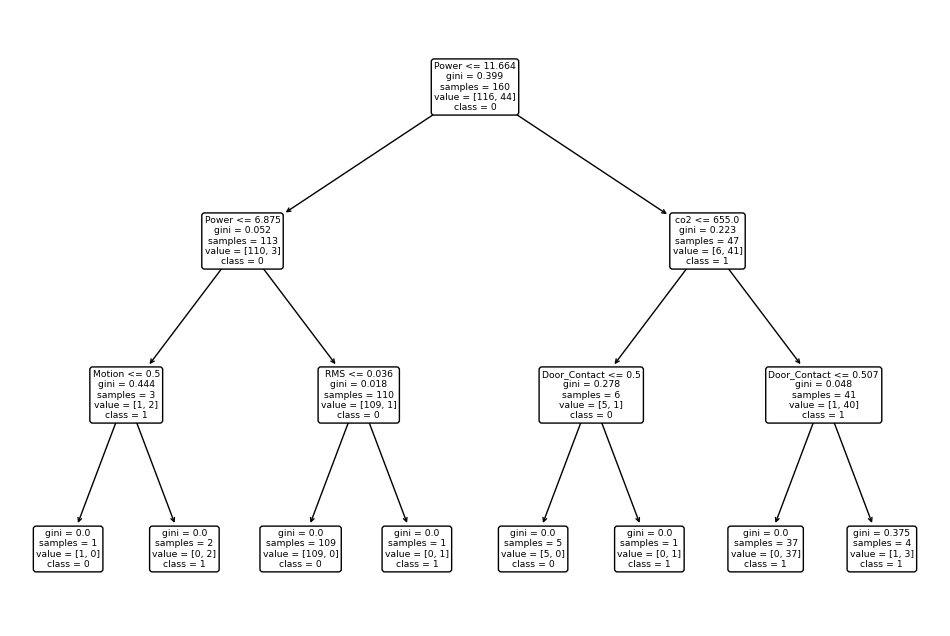

In [55]:
plt.figure(figsize=(12, 8))
plot_tree(SER_cluster, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()

In [56]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train_t, y_train_t)

SER_tomek = copy.deepcopy(clf)
ser.SER(0, SER_tomek, X_res, y_res, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_tomek.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
roc = roc_auc_score(y_test_t, y_pred)
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix imb ser smotetomek:")
print(cm)


accuracy: 0.9262114537444934
weighted f1 score: 0.9251885850221414
ROC AUC score: 0.8951679248935347
precision: [0.93500739 0.9004329 ]
recall; [0.96493902 0.82539683]
fscore: [0.94973743 0.86128364]
support: [656 252]
Confusion Matrix imb ser smotetomek:
[[633  23]
 [ 44 208]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy: 0.9427312775330396
weighted f1 score: 0.9429366009412178
ROC AUC score: 0.932261420828494
precision: [0.96461538 0.8875969 ]
recall; [0.95579268 0.90873016]
fscore: [0.96018377 0.89803922]
support: [656 252]
Confusion Matrix ser smotetomek:
[[627  29]
 [ 23 229]]


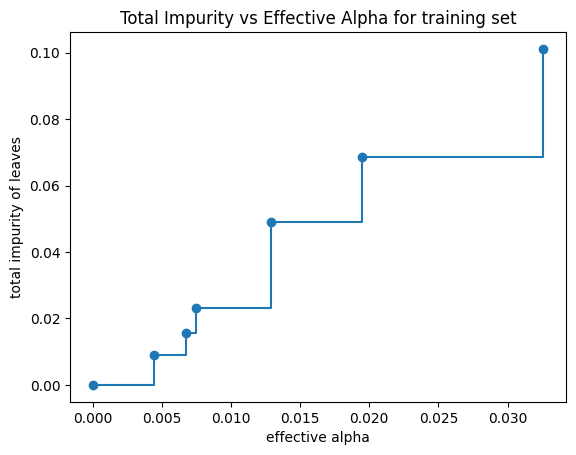

In [71]:
# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_tomek.cost_complexity_pruning_path(X_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_tomekk = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth=3, class_weight='balanced')

# Re-fit the tree
SER_tomekk.fit(X_res, y_res)

y_pred = SER_tomekk.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print("accuracy:",accuracy_score(y_test_t, y_pred))
print('weighted f1 score:', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smotetomek:")
print(cm)

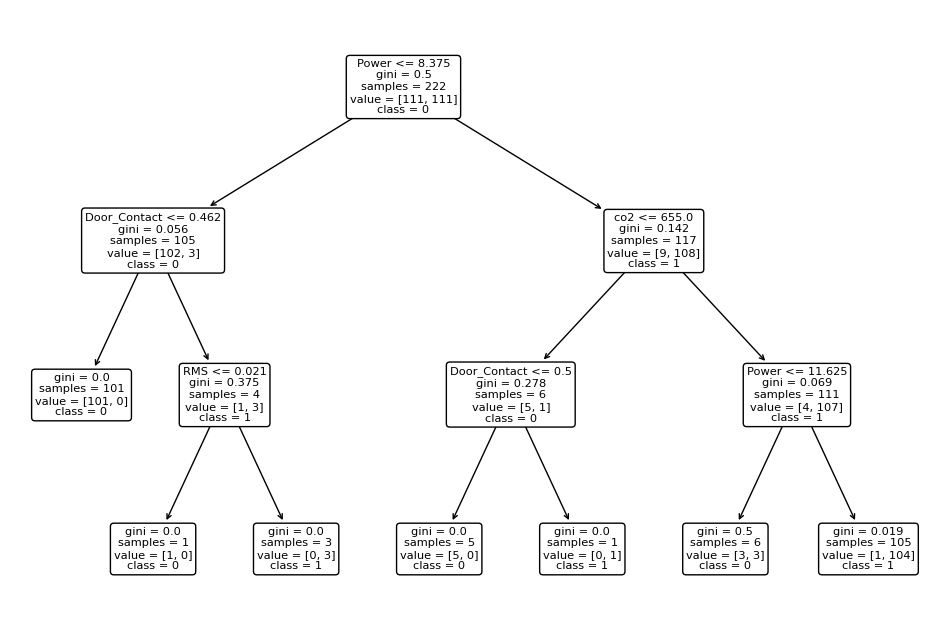

In [72]:
plt.figure(figsize=(12, 8))
plot_tree(SER_tomekk, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()